<a href="https://www.kaggle.com/code/praths71018/eye-disease-detection?scriptVersionId=171536699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import numpy as np  # Linear algebra
# import pandas as pd  # Data processing, CSV file I/O (e.g., pd.read_csv)
# import os  

# # Define the local dataset path
# dataset_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset"

# # List all files in the dataset directory
# for dirname, _, filenames in os.walk(dataset_path):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))  # Print full file paths
import numpy as np  # For numerical operations
import pandas as pd  # For handling CSV files
import os  # For file and directory operations

# Define the local dataset path
dataset_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset"

# List only the first 10 files to avoid excessive output
file_count = 0
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))  
        file_count += 1
        if file_count >= 10:  # Stop after printing 10 files
            break



C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\.DS_Store
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\1.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\10.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\100.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\101.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\102.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\103.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\104.jpg
C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye

# Importing Modules

In [2]:
# # Data Handling & Processing
# import numpy as np
# import pandas as pd
# import os
# import random
# import shutil
# # Data Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.image as mpimg
# # Image Processing
# import cv2
# # TensorFlow & Keras (Deep Learning)
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import (
#     Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
#     BatchNormalization, GlobalAveragePooling2D
# )
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.regularizers import l2
# # Machine Learning & Performance Metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# # Utilities
# from tqdm import tqdm
# import warnings
# # Ignore warnings
# warnings.filterwarnings('ignore')
# Data Handling & Processing
import numpy as np
import pandas as pd
import os
import random
import shutil

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# Image Processing
import cv2

# TensorFlow & Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
    BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2

# Machine Learning & Performance Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Utilities
from tqdm import tqdm
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Reduce TensorFlow logging to minimize console spam
tf.get_logger().setLevel('ERROR')



# Loading Dataset and EDA

In [79]:
import pandas as pd

# Define dataset path
path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv"

# Load dataset
df = pd.read_csv(path)  

import pandas as pd

# Define the correct path
path = r'C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv'

# Read the CSV file
df = pd.read_csv(path)

# Display the first few rows
print(df.head())
# print(df_sample.head())

    name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3


Dataset Columns: Index(['name', 'category', 'type', 'grade'], dtype='object')
Checking image: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\429.jpg


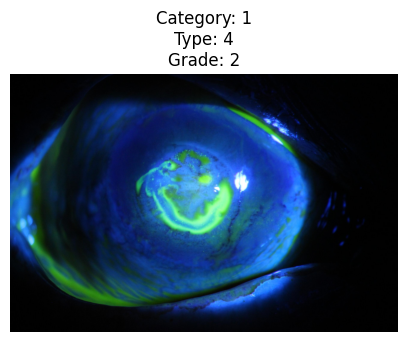

Checking image: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\114.jpg


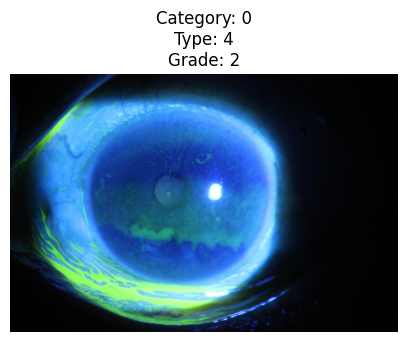

Checking image: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\370.jpg


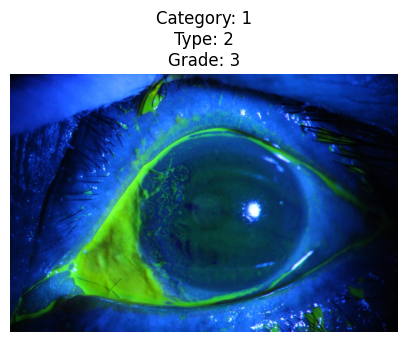

Checking image: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\27.jpg


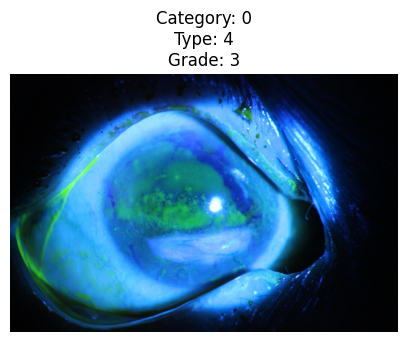

Checking image: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images\58.jpg


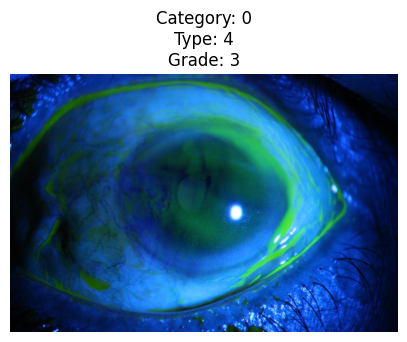

In [ ]:

import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define local paths
image_dir = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images"
csv_file_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv"

# Load dataset
dataset = pd.read_csv(csv_file_path)

# Debug: Print column names
print("Dataset Columns:", dataset.columns)

# Ensure correct column names exist
required_columns = {'name', 'category', 'type', 'grade'}
missing_columns = required_columns - set(dataset.columns)
if missing_columns:
    raise ValueError(f"Dataset is missing required columns: {missing_columns}")

# Select random images (ensure we don't exceed dataset size)
num_images = min(5, len(dataset))
random_image_indices = random.sample(range(len(dataset)), num_images)

# Display images
for idx in random_image_indices:
    image_name = dataset.loc[idx, 'name']
    image_path = os.path.join(image_dir, image_name)

    # Debug: Print image path
    print(f"Checking image: {image_path}")

    if os.path.exists(image_path):
        image = mpimg.imread(image_path)
        plt.figure(figsize=(5, 5))  # Reduce figure size to optimize performance
        plt.imshow(image)
        plt.title(f"Category: {dataset.loc[idx, 'category']}\nType: {dataset.loc[idx, 'type']}\nGrade: {dataset.loc[idx, 'grade']}")
        plt.axis('off')
        plt.show()
    else:
        print(f"⚠ Image not found: {image_path}")



In [81]:
import pandas as pd  

csv_file_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv"

df = pd.read_csv(csv_file_path)  
print(df.head())  # Verify if data is loaded
Type_of_category = df['category'].unique()
print(Type_of_category)


    name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3
[0 1 2]


In [3]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [4]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [5]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}
{3: 273, 2: 203, 1: 98, 0: 36, 4: 102}


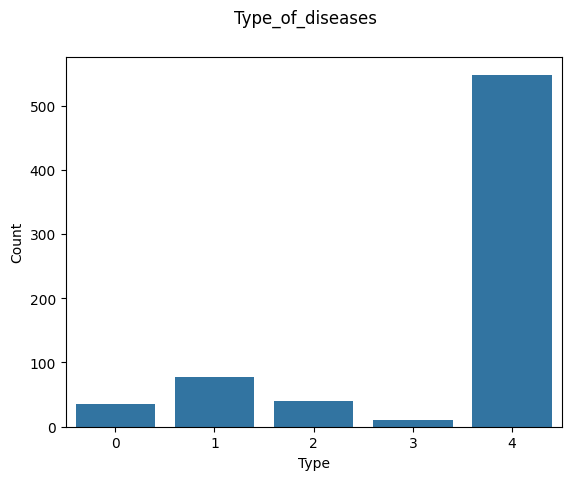

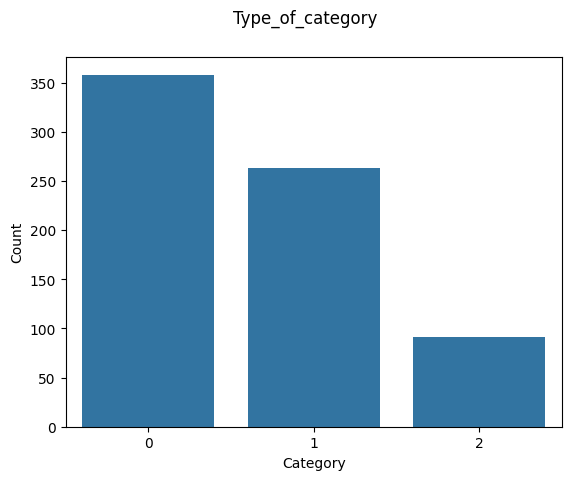

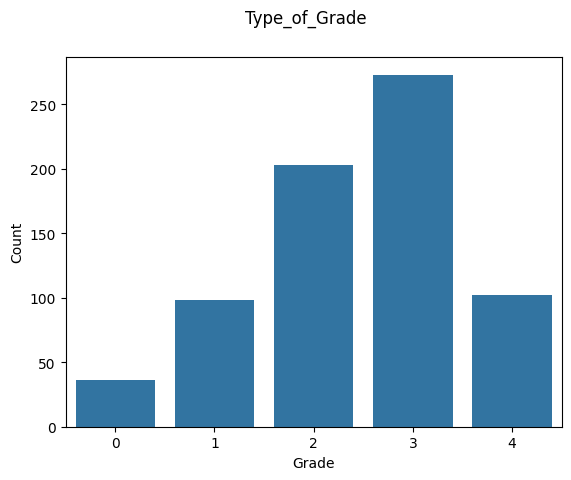

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt  # Make sure Matplotlib is also imported

sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Data Augmentation

In [8]:

import os
import cv2
import pandas as pd

# Load dataset paths
csv_file_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\labels.csv"
image_folder = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images"
output_folder = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\augmented_images"

# Read the dataset CSV
df = pd.read_csv(csv_file_path)

# Create output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to perform image augmentation
def augment_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠ Error: Could not read {image_path}")
        return []
    
    augmented_images = [(image, "orig")]  # Store original image
    if image.shape[0] > 0 and image.shape[1] > 0:
        augmented_images.append((cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE), "rot90"))  # 90° Rotation
        augmented_images.append((cv2.flip(image, 1), "flip"))  # Horizontal Flip
    
    return augmented_images

# Process images with augmentation
augmented_dataset = []
for index, row in df.iterrows():
    image_name = row['name']
    image_path = os.path.join(image_folder, image_name)

    if not os.path.exists(image_path):
        print(f"⚠ Warning: Image {image_name} not found, skipping...")
        continue

    for augmented_image, aug_type in augment_image(image_path):
        augmented_image_name = f"{os.path.splitext(image_name)[0]}_{aug_type}.jpg"
        augmented_image_path = os.path.join(output_folder, augmented_image_name)

        cv2.imwrite(augmented_image_path, augmented_image, [cv2.IMWRITE_JPEG_QUALITY, 80])  # Reduce image size

        # Store new image metadata
        augmented_dataset.append({
            'name': augmented_image_name,
            'category': row['category'],
            'type': row['type'],
            'grade': row['grade']
        })

# Merge augmented data with original dataset
augmented_df = pd.DataFrame(augmented_dataset)
combined_df = pd.concat([df, augmented_df], ignore_index=True)

# Save updated dataset
combined_csv_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\combined_dataset.csv"
combined_df.to_csv(combined_csv_path, index=False)

print(f"✅ Augmentation completed. Combined dataset saved: {combined_csv_path}")



✅ Augmentation completed. Combined dataset saved: C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\combined_dataset.csv


In [9]:
import os
import shutil

# Source and destination paths
source_images_folder = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\dataset\images"
destination_images_folder = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\augmented_images"

# Copy images
if os.path.exists(source_images_folder) and os.path.isdir(source_images_folder):
    if not os.path.exists(destination_images_folder):
        os.makedirs(destination_images_folder)
    
    copied_files = 0  # Counter for copied files
    
    for file_name in os.listdir(source_images_folder):
        source_file = os.path.join(source_images_folder, file_name)
        destination_file = os.path.join(destination_images_folder, file_name)
        shutil.copyfile(source_file, destination_file)
        print(f"Copied: {file_name}")  # Log copied files
        copied_files += 1
    
    print(f"\nSuccessfully copied {copied_files} images.")
else:
    print("Source images folder not found.")



Copied: 1.jpg
Copied: 10.jpg
Copied: 100.jpg
Copied: 101.jpg
Copied: 102.jpg
Copied: 103.jpg
Copied: 104.jpg
Copied: 105.jpg
Copied: 106.jpg
Copied: 107.jpg
Copied: 108.jpg
Copied: 109.jpg
Copied: 11.jpg
Copied: 110.jpg
Copied: 111.jpg
Copied: 112.jpg
Copied: 113.jpg
Copied: 114.jpg
Copied: 115.jpg
Copied: 116.jpg
Copied: 117.jpg
Copied: 118.jpg
Copied: 119.jpg
Copied: 12.jpg
Copied: 120.jpg
Copied: 121.jpg
Copied: 122.jpg
Copied: 123.jpg
Copied: 124.jpg
Copied: 125.jpg
Copied: 126.jpg
Copied: 127.jpg
Copied: 128.jpg
Copied: 129.jpg
Copied: 13.jpg
Copied: 130.jpg
Copied: 131.jpg
Copied: 132.jpg
Copied: 133.jpg
Copied: 134.jpg
Copied: 135.jpg
Copied: 136.jpg
Copied: 137.jpg
Copied: 138.jpg
Copied: 139.jpg
Copied: 14.jpg
Copied: 140.jpg
Copied: 141.jpg
Copied: 142.jpg
Copied: 143.jpg
Copied: 144.jpg
Copied: 145.jpg
Copied: 146.jpg
Copied: 147.jpg
Copied: 148.jpg
Copied: 149.jpg
Copied: 15.jpg
Copied: 150.jpg
Copied: 151.jpg
Copied: 152.jpg
Copied: 153.jpg
Copied: 154.jpg
Copied: 155.jpg


In [10]:
df=combined_df
df

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3
...,...,...,...,...
2843,711_rot90.jpg,2,3,4
2844,711_flip.jpg,2,3,4
2845,712_orig.jpg,2,4,4
2846,712_rot90.jpg,2,4,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2848 non-null   object
 1   category  2848 non-null   int64 
 2   type      2848 non-null   int64 
 3   grade     2848 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 89.1+ KB


In [12]:
train_image = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\augmented_images"
print(train_image)


C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\augmented_images


In [13]:
df.nunique()

name        2848
category       3
type           5
grade          5
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2848 non-null   object
 1   category  2848 non-null   int64 
 2   type      2848 non-null   int64 
 3   grade     2848 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 89.1+ KB


In [15]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2], dtype=int64)

In [16]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3], dtype=int64)

In [17]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4], dtype=int64)

In [18]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 2192, 2: 160, 1: 312, 0: 144, 3: 40}
{0: 1432, 1: 1052, 2: 364}
{3: 1092, 2: 812, 1: 392, 0: 144, 4: 408}


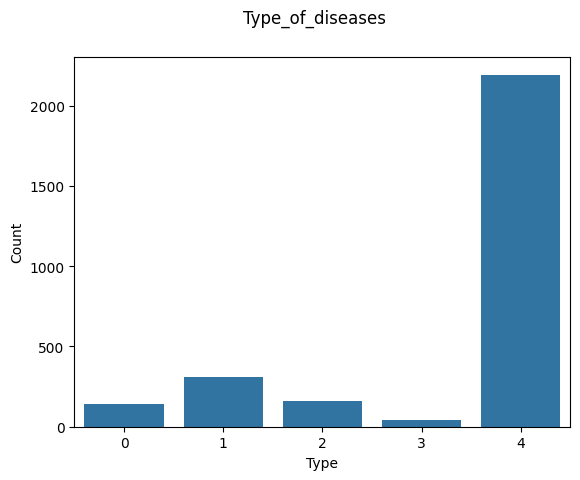

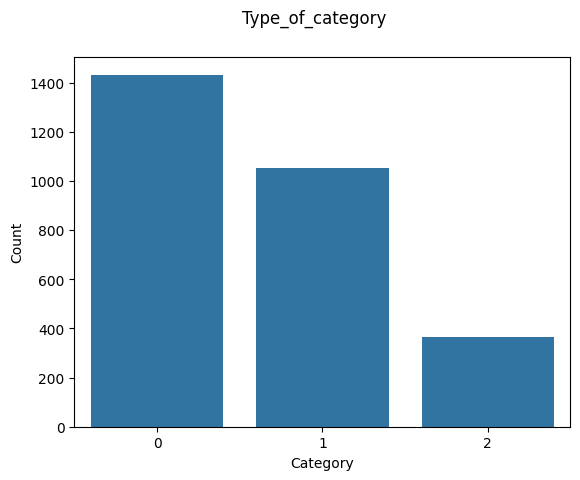

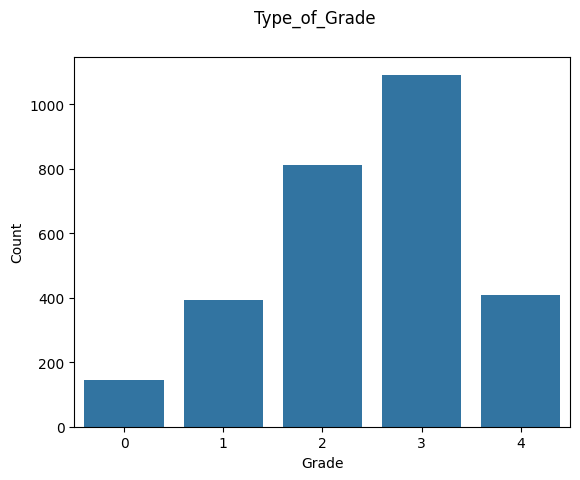

In [19]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Model Building

# Category

In [27]:
import pandas as pd

# Load CSV
csv_path = "C:/Users/Ajay bhan/Desktop/Eye_Disease_Prediction-main/Eye_Disease_Prediction-main/dataset/labels.csv"
df = pd.read_csv(csv_path)

# Check first few rows
print(df.head())

# Verify that the 'name' column contains valid image filenames
print("Unique values in 'name' column:", df['name'].unique()[:10])


    name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3
Unique values in 'name' column: ['1.jpg' '2.jpg' '3.jpg' '4.jpg' '5.jpg' '6.jpg' '7.jpg' '8.jpg' '9.jpg'
 '10.jpg']


In [28]:
import os

dataset_path = "C:/Users/Ajay bhan/Desktop/Eye_Disease_Prediction-main/Eye_Disease_Prediction-main/dataset/images/"
missing_images = []

for img_name in df['name']:
    img_path = os.path.join(dataset_path, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

if missing_images:
    print(f"⚠️ {len(missing_images)} images are missing!")
    print("Example missing images:", missing_images[:10])
else:
    print("✅ All images exist!")


✅ All images exist!


In [20]:

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing import image

# Load dataset CSV (Ensure df is defined)
csv_file_path = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\combined_dataset.csv"
df = pd.read_csv(csv_file_path)

# Path to the augmented images folder
train_image_folder = r"C:\Users\Ajay bhan\Desktop\Eye_Disease_Prediction-main\Eye_Disease_Prediction-main\augmented_images"

# Initialize list to store image arrays
train_images = []

# Preallocate space for faster computation (if dataset size is known)
total_images = len(df)
X = np.empty((total_images, 224, 224, 3), dtype=np.float32)

# Load images efficiently
valid_count = 0  # Counter for valid images
for i in tqdm(range(total_images), desc="Processing Images", ncols=100):
    img_path = os.path.join(train_image_folder, df.loc[i, 'name'])  # Use loc for better indexing
    if os.path.exists(img_path):  # Check if image exists before loading
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # Normalize

        # Store in preallocated array
        X[valid_count] = img_array
        valid_count += 1
    else:
        print(f"⚠ Warning: Image {df.loc[i, 'name']} not found, skipping.")

# Trim unused space in preallocated array
X = X[:valid_count]

# Output final shape
print(f"✅ Loaded {valid_count}/{total_images} images. Final shape: {X.shape}")



Processing Images: 100%|████████████████████████████████████████| 2848/2848 [11:51<00:00,  4.00it/s]


✅ Loaded 2848/2848 images. Final shape: (2848, 224, 224, 3)


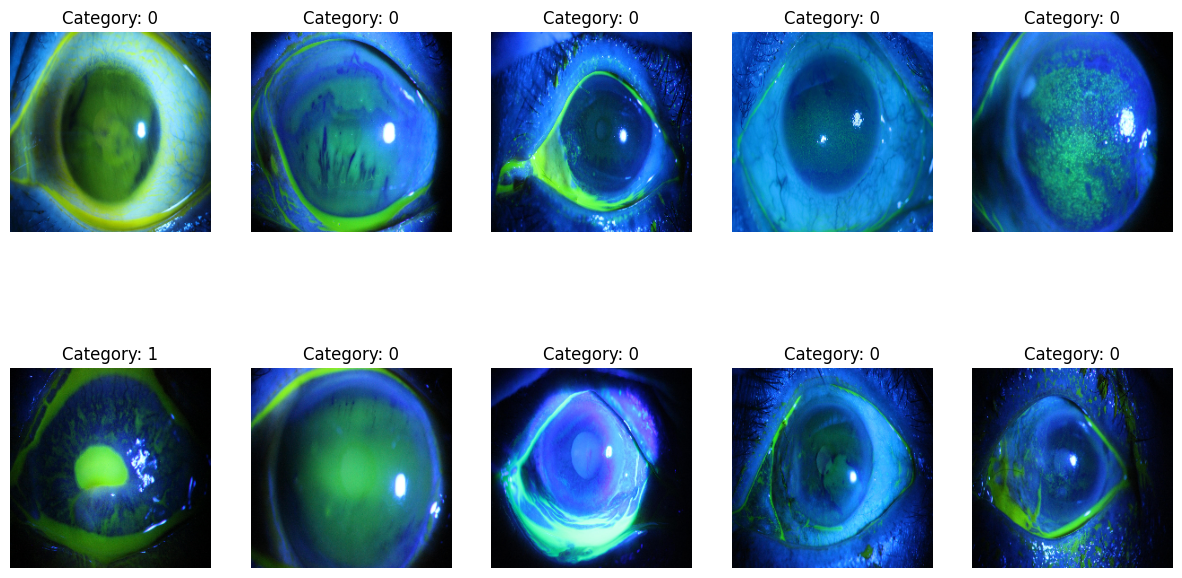

In [30]:
import random
import matplotlib.pyplot as plt

# Ensure train_images is not empty
if len(train_images) > 0:
    # If there are at least 10 images, sample 10 randomly; otherwise, use all available images
    num_samples = min(10, len(train_images))
    sample_indices = random.sample(range(len(train_images)), num_samples)

    # Display the images with their corresponding labels
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(train_images[idx])  # Show the image
        plt.title(f"Category: {df['category'].iloc[idx]}")  # Get label
        plt.axis('off')  # Hide axis

    plt.show(block=True)  # Ensure plot is displayed
else:
    print("⚠️ No images found in train_images.")




In [34]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ensure train_images is a NumPy array
X = np.array(train_images)  

# Check if df has the same number of rows as train_images
if len(df) != len(train_images):
    df = df.iloc[:len(train_images)]  # Trim the DataFrame to match images

# Extract category labels
y = df['category'].values  

# Check the number of images and labels before splitting
print("Number of images:", X.shape[0])
print("Number of labels:", y.shape[0])

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Number of images: 376
Number of labels: 376
Training data shape: (263, 224, 224, 3) (263,)
Testing data shape: (113, 224, 224, 3) (113,)


In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam  

# # Define the CNN architecture
# input_layer = Input(shape=(224, 224, 3))


# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# import pandas as pd
# # Convolutional layers
# conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
# conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
# # Flatten layer
# flatten = Flatten()(pool2)
# # Fully connected layers with L2 regularization
# dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten)
# dropout1 = Dropout(0.7)(dense1)
# dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
# dropout2 = Dropout(0.5)(dense2)
# # Output layer
# output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)
# Import necessary modules


In [91]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
    BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Define input layer
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers with Batch Normalization
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Global Average Pooling (Instead of Flatten)
gap = GlobalAveragePooling2D()(pool3)

# Fully connected layers with L2 regularization
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(gap)
dropout1 = Dropout(0.4)(dense1)

dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = Dropout(0.3)(dense2)

# Output layer
output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)

# Define model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for stability
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,291 (1.12 MB)

 Trainable params: 291,843 (1.11 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,703,491 (365.08 MB)

 Trainable params: 95,703,491 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
from tensorflow.keras.utils import to_categorical

# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 2, 2, 2, 2), output.shape=(None, 3)

In [37]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9581748843193054
Test Accuracy: 0.9380530714988708


In [38]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


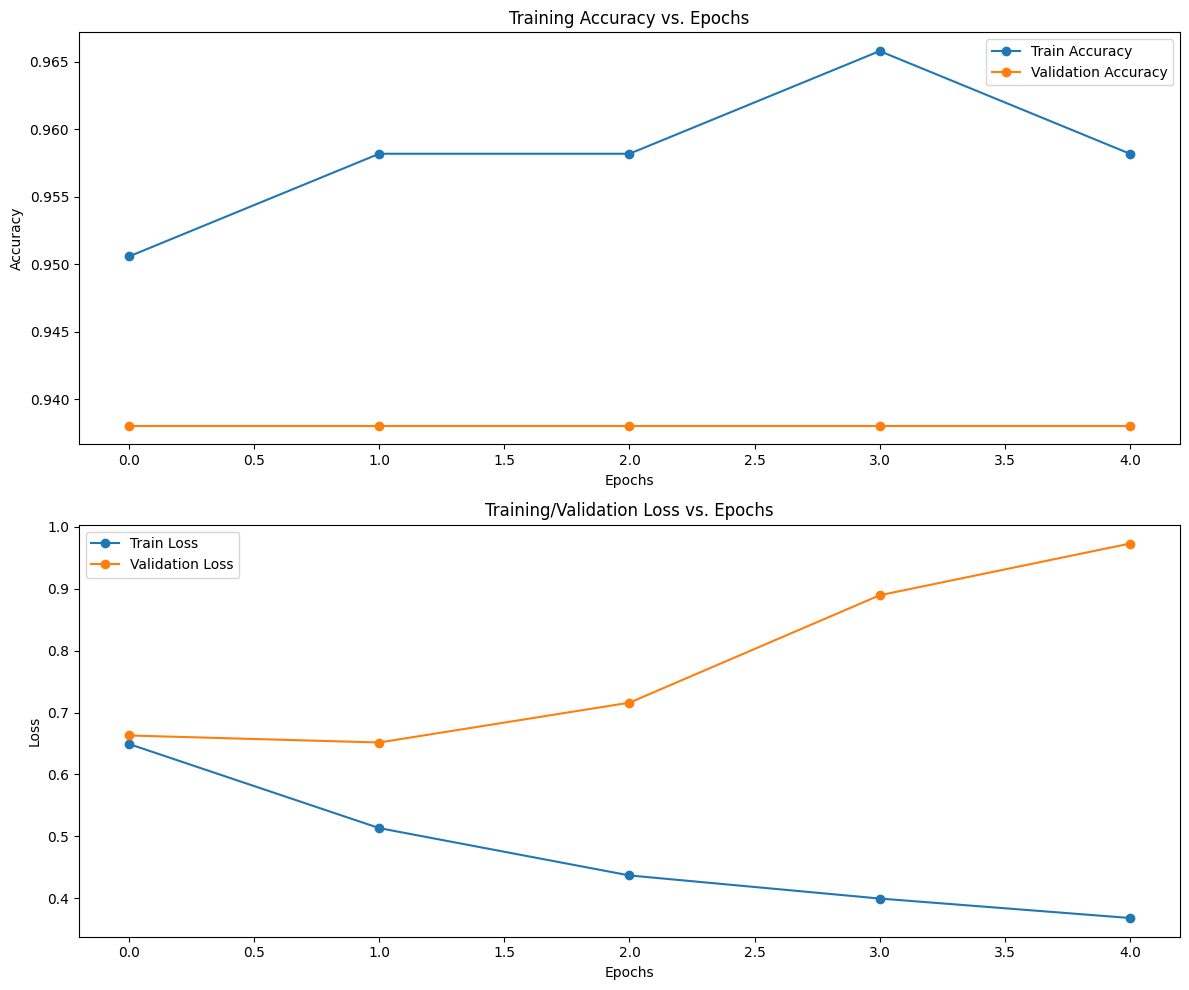

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()


In [40]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [41]:
y_pred=model.predict(X_test) 
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 512ms/step


array([[9.99999762e-01, 2.05444167e-07],
       [9.99774277e-01, 2.25681506e-04],
       [9.99999762e-01, 2.63316451e-07],
       [9.99969959e-01, 3.00515821e-05],
       [9.98059809e-01, 1.94022537e-03],
       [9.99991417e-01, 8.60337605e-06],
       [9.99994397e-01, 5.61708021e-06],
       [9.99998927e-01, 1.07502353e-06],
       [9.99974847e-01, 2.51834754e-05],
       [9.99996781e-01, 3.27684938e-06],
       [9.99999881e-01, 1.07987290e-07],
       [9.99999881e-01, 1.56275391e-07],
       [9.99999404e-01, 6.33795651e-07],
       [9.99999046e-01, 8.96471022e-07],
       [9.99999762e-01, 2.13744883e-07],
       [9.99979496e-01, 2.05013966e-05],
       [9.99955297e-01, 4.46941631e-05],
       [9.99997973e-01, 2.03921741e-06],
       [9.99913692e-01, 8.62902962e-05],
       [9.99918580e-01, 8.14362793e-05],
       [9.99997735e-01, 2.32276125e-06],
       [9.99866247e-01, 1.33738693e-04],
       [9.99828935e-01, 1.71047534e-04],
       [9.99995828e-01, 4.18738273e-06],
       [9.998853

In [42]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [43]:
y_pred_train=model.predict(X_train) 
y_pred_train

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step


array([[9.99999404e-01, 6.26991437e-07],
       [9.99982119e-01, 1.79052622e-05],
       [9.99998093e-01, 1.87331079e-06],
       [9.99999642e-01, 3.78817106e-07],
       [9.99998331e-01, 1.62109802e-06],
       [9.99821365e-01, 1.78662362e-04],
       [9.99958873e-01, 4.11427027e-05],
       [9.99999881e-01, 6.16326687e-08],
       [9.99995708e-01, 4.25163671e-06],
       [9.99998450e-01, 1.56858437e-06],
       [9.99999762e-01, 1.98242418e-07],
       [9.99992013e-01, 7.97871144e-06],
       [9.99966502e-01, 3.35495024e-05],
       [9.99999404e-01, 6.23207143e-07],
       [9.99913931e-01, 8.60276268e-05],
       [9.99962449e-01, 3.75253840e-05],
       [9.99998569e-01, 1.43229374e-06],
       [9.99994278e-01, 5.70289194e-06],
       [9.99998808e-01, 1.24951691e-06],
       [9.99999762e-01, 2.55490733e-07],
       [9.99925971e-01, 7.40471442e-05],
       [9.99988079e-01, 1.18928256e-05],
       [9.99994755e-01, 5.26275880e-06],
       [9.99998927e-01, 1.07521623e-06],
       [9.999538

In [44]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [51]:
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_train = model.predict(X_train)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Convert one-hot labels to class indices if needed
if len(y_train.shape) > 1:
    y_train_labels = np.argmax(y_train, axis=1)  # Convert from one-hot encoding
else:
    y_train_labels = y_train  # If already class indices, keep as is

# Count occurrences of each class
unique_classes, class_counts = np.unique(y_train_labels, return_counts=True)

# Print class distribution
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} instances")

# Detect missing classes (assuming the dataset should contain all possible classes)
num_classes = len(np.unique(y_train_labels))  # Total number of classes in the dataset
all_classes = np.arange(num_classes)  # Expected classes
missing_classes = set(all_classes) - set(unique_classes)

if missing_classes:
    print("\nMissing Classes:", missing_classes)




4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step
Class 0: 252 instances
Class 1: 11 instances


In [52]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 263 instances


In [53]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.shape[1] > 1 else (y_pred > 0.5).astype("int32")

# Ensure y_test is in the correct format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred_classes))



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       106
           1       0.00      0.00      0.00         7

    accuracy                           0.94       113
   macro avg       0.47      0.50      0.48       113
weighted avg       0.88      0.94      0.91       113



c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Type

In [54]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df['type'].values, test_size=0.3, random_state=42)

In [55]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model1 = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [56]:
history = model1.fit(
    X_train1, y_train1,
    epochs=3,  # Start with fewer epochs
    batch_size=16,  # Reduce batch size
    validation_data=(X_test1, y_test1),
    verbose=1
)

Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 865ms/step - accuracy: 0.5717 - loss: 1.6711 - val_accuracy: 0.7080 - val_loss: 0.9959
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 638ms/step - accuracy: 0.7278 - loss: 0.9617 - val_accuracy: 0.7080 - val_loss: 0.9580
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 633ms/step - accuracy: 0.6998 - loss: 0.9630 - val_accuracy: 0.7080 - val_loss: 1.0463


In [57]:
# Evaluate the model
train_loss1, train_accuracy1 = model1.evaluate(X_train1, y_train1, verbose=0)
print("Training Accuracy:", train_accuracy1)
test_loss1, test_accuracy1 = model1.evaluate(X_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy1)

Training Accuracy: 0.730038046836853
Test Accuracy: 0.7079645991325378


In [58]:
train_accuracy1 = history.history['accuracy']
val_accuracy1 = history.history['val_accuracy']

train_loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

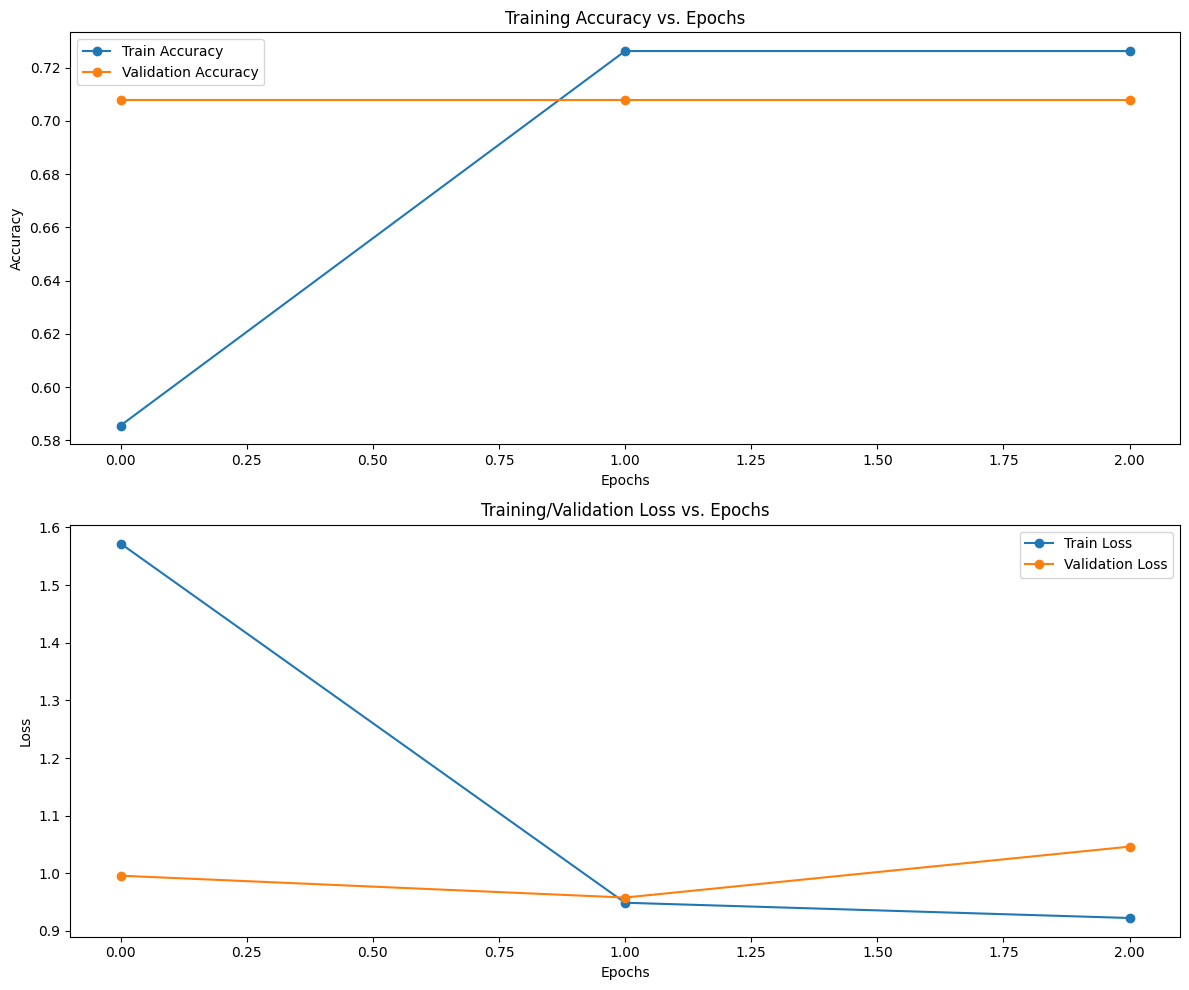

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy1, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy1, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss1, 'o-', label='Train Loss')
ax[1].plot(val_loss1, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [60]:
y_test1

array([4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 1, 4, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 0, 0, 4, 0, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 1, 4, 3, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 0, 2, 4,
       2, 4, 4, 0, 4, 4, 4, 2, 4, 4, 1, 1, 4, 1, 4, 2, 4, 4, 4, 4, 4, 0,
       4, 1, 0], dtype=int64)

In [61]:
y_pred1=model1.predict(X_test1) 
y_pred1

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


array([[0.02974089, 0.06416973, 0.02043666, 0.00315514, 0.88249755],
       [0.10810112, 0.15158904, 0.0646055 , 0.0220528 , 0.65365154],
       [0.07635178, 0.06855599, 0.03677464, 0.0082249 , 0.8100926 ],
       [0.02049852, 0.09056252, 0.01875958, 0.00331039, 0.866869  ],
       [0.0770798 , 0.1312587 , 0.04355428, 0.0100765 , 0.7380307 ],
       [0.06596325, 0.1362271 , 0.03608445, 0.00795031, 0.7537748 ],
       [0.05318653, 0.06757955, 0.03140549, 0.00583839, 0.84199   ],
       [0.02686039, 0.07955441, 0.02526337, 0.0054113 , 0.86291045],
       [0.02489007, 0.09186612, 0.02429586, 0.00466418, 0.8542838 ],
       [0.03770224, 0.08886451, 0.02458543, 0.00503591, 0.84381187],
       [0.03772208, 0.0886551 , 0.03419841, 0.00542028, 0.83400404],
       [0.03562547, 0.07283913, 0.03433622, 0.00761544, 0.8495838 ],
       [0.05805868, 0.10837645, 0.05044735, 0.01371591, 0.7694016 ],
       [0.0169835 , 0.07559527, 0.0254424 , 0.00520713, 0.8767717 ],
       [0.03013509, 0.06265645, 0.

In [62]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int64)

In [63]:
print(classification_report(y_test1,y_pred_classes1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         2
           4       0.71      1.00      0.83        80

    accuracy                           0.71       113
   macro avg       0.14      0.20      0.17       113
weighted avg       0.50      0.71      0.59       113



c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [64]:
y_pred1_train=model1.predict(X_train1) 
y_pred1

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 899ms/step


array([[0.02974089, 0.06416973, 0.02043666, 0.00315514, 0.88249755],
       [0.10810112, 0.15158904, 0.0646055 , 0.0220528 , 0.65365154],
       [0.07635178, 0.06855599, 0.03677464, 0.0082249 , 0.8100926 ],
       [0.02049852, 0.09056252, 0.01875958, 0.00331039, 0.866869  ],
       [0.0770798 , 0.1312587 , 0.04355428, 0.0100765 , 0.7380307 ],
       [0.06596325, 0.1362271 , 0.03608445, 0.00795031, 0.7537748 ],
       [0.05318653, 0.06757955, 0.03140549, 0.00583839, 0.84199   ],
       [0.02686039, 0.07955441, 0.02526337, 0.0054113 , 0.86291045],
       [0.02489007, 0.09186612, 0.02429586, 0.00466418, 0.8542838 ],
       [0.03770224, 0.08886451, 0.02458543, 0.00503591, 0.84381187],
       [0.03772208, 0.0886551 , 0.03419841, 0.00542028, 0.83400404],
       [0.03562547, 0.07283913, 0.03433622, 0.00761544, 0.8495838 ],
       [0.05805868, 0.10837645, 0.05044735, 0.01371591, 0.7694016 ],
       [0.0169835 , 0.07559527, 0.0254424 , 0.00520713, 0.8767717 ],
       [0.03013509, 0.06265645, 0.

In [65]:
y_pred_classes1_train = np.argmax(y_pred1_train, axis=1)
y_pred_classes1_train

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

In [66]:
class_counts = np.bincount(y_pred_classes1_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 0 instances
Class 1: 0 instances
Class 2: 0 instances
Class 3: 0 instances
Class 4: 263 instances


In [67]:
y_train1

array([4, 0, 4, 4, 1, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 4, 0, 1, 4, 4, 4, 4, 0, 2, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 1, 4, 0, 1, 4, 0, 4, 2, 4, 4, 4, 4, 2, 0, 4,
       4, 1, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4,
       2, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 0, 4, 4, 1, 2,
       4, 4, 4, 3, 1, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 1, 4, 4],
      dtype=int64)

In [68]:
class_counts = np.bincount(y_train1)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 25 instances
Class 1: 28 instances
Class 2: 16 instances
Class 3: 2 instances
Class 4: 192 instances


# Grade 

In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['grade'].values, test_size=0.3, random_state=42)

In [70]:
# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with improved settings
history = model.fit(
    X_train2, y_train2,
    epochs=20,  # Increased epochs
    batch_size=32,  # Larger batch size for stability
    validation_split=0.2,  # More validation data for better generalization
    callbacks=[early_stopping, reduce_lr],  # Apply callbacks
    verbose=1
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5073 - loss: 1.2284 - val_accuracy: 0.4340 - val_loss: 1.2498 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4529 - loss: 1.2501 - val_accuracy: 0.4717 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4923 - loss: 1.2248 - val_accuracy: 0.4717 - val_loss: 1.2585 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5250 - loss: 1.1648 - val_accuracy: 0.5094 - val_loss: 1.2268 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5445 - loss: 1.1087 - val_accuracy: 0.4528 - val_loss: 1.2529 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4625 - loss: 1.2433 - val_accuracy: 0.4717 - val_loss: 1.2127 - learning_rate: 5.0000e-04
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4916 - loss: 1.1681 - val_accuracy: 0.5094 - val_loss

In [83]:
# Evaluate the model
train_loss2, train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)
print("Training Accuracy:", train_accuracy2)
test_loss2, test_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)
print("Test Accuracy:", test_accuracy2)

Training Accuracy: 0.5665399432182312
Test Accuracy: 0.40707963705062866


In [73]:
train_accuracy2 = history.history['accuracy']
val_accuracy2 = history.history['val_accuracy']

train_loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

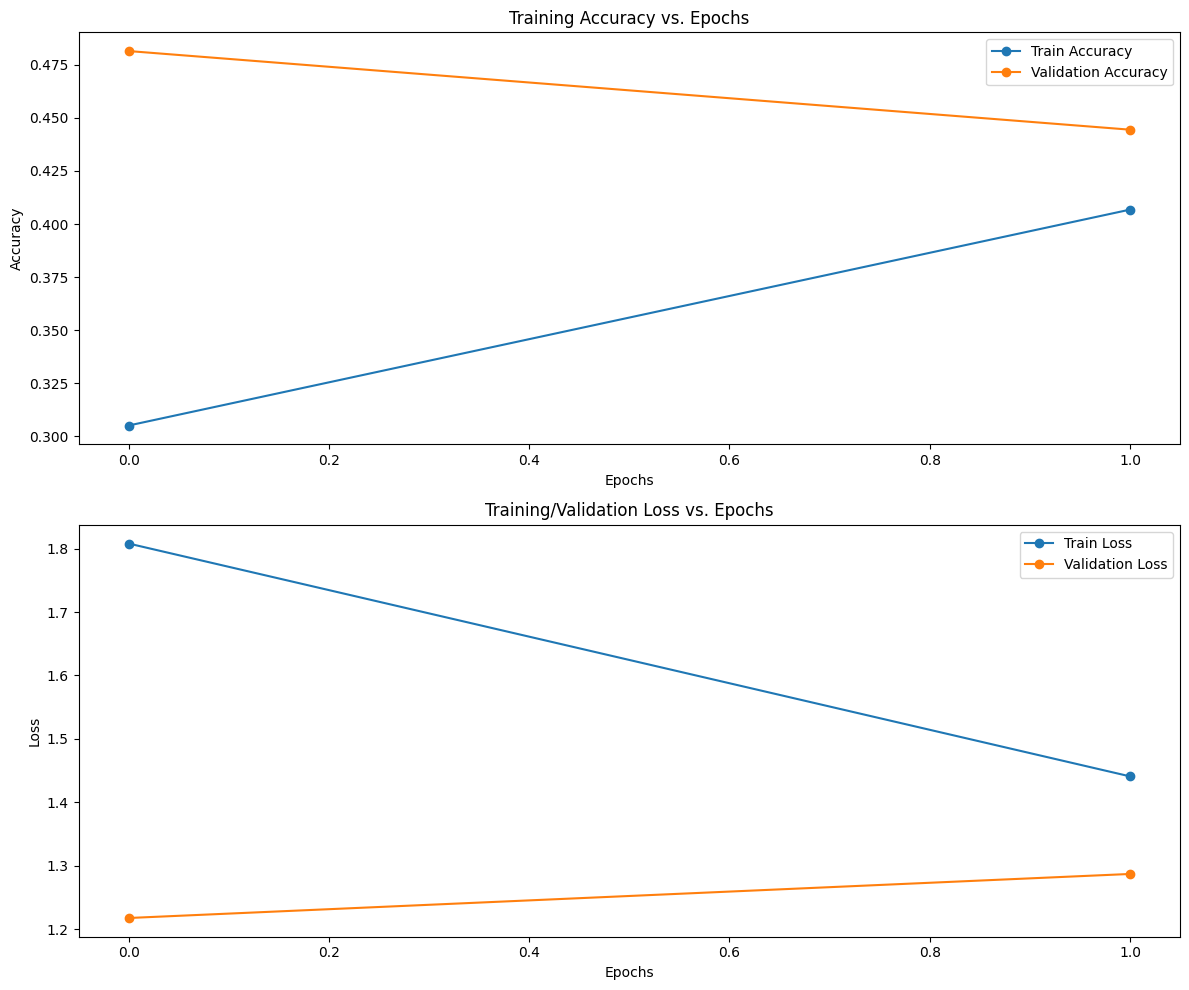

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy2, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy2, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss2, 'o-', label='Train Loss')
ax[1].plot(val_loss2, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [75]:
y_test2

array([2, 0, 3, 3, 2, 0, 2, 3, 1, 4, 3, 2, 3, 4, 1, 2, 3, 3, 0, 1, 0, 3,
       3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3,
       2, 3, 3, 0, 0, 2, 0, 2, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 3, 1, 4, 2,
       3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 2, 0, 3, 3,
       1, 2, 3, 0, 4, 3, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 0,
       3, 3, 0], dtype=int64)

In [76]:
y_pred2=model.predict(X_test2) 
y_pred2

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


array([[0.09259371, 0.2243946 , 0.18879922, 0.468095  , 0.02611748],
       [0.11202247, 0.19677417, 0.11446928, 0.52823365, 0.04850046],
       [0.1147948 , 0.26409173, 0.1973409 , 0.39400795, 0.0297646 ],
       [0.06402081, 0.15385474, 0.12795608, 0.6258817 , 0.02828674],
       [0.14934827, 0.20122822, 0.11490942, 0.4814927 , 0.05302136],
       [0.12911896, 0.38488212, 0.12209266, 0.33536386, 0.02854242],
       [0.14389423, 0.22957699, 0.24703969, 0.35243148, 0.02705757],
       [0.08881591, 0.15146647, 0.20586616, 0.5225088 , 0.03134264],
       [0.09008943, 0.25345483, 0.1886182 , 0.44082162, 0.02701592],
       [0.09536964, 0.20359904, 0.14534363, 0.51870185, 0.03698584],
       [0.1139677 , 0.18279456, 0.27804008, 0.38978803, 0.03540958],
       [0.08314187, 0.15719357, 0.21816082, 0.5089266 , 0.03257716],
       [0.06316036, 0.13212529, 0.15986246, 0.6097157 , 0.03513616],
       [0.05570646, 0.10291159, 0.1507632 , 0.6508873 , 0.03973145],
       [0.13241641, 0.21575923, 0.

In [77]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes2

array([3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int64)

In [78]:
print(classification_report(y_test2,y_pred_classes2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.50      0.10      0.17        10
           2       0.00      0.00      0.00        39
           3       0.43      1.00      0.60        48
           4       0.00      0.00      0.00         5

    accuracy                           0.43       113
   macro avg       0.19      0.22      0.15       113
weighted avg       0.23      0.43      0.27       113



c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ajay bhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_